In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import kmeans_segmentation as kseg
%matplotlib inline

from skimage import feature, measure
from skimage.measure import label
from skimage.io import imread, imshow
from skimage.morphology import binary_closing
from scipy.ndimage.morphology import binary_fill_holes

from scipy import ndimage

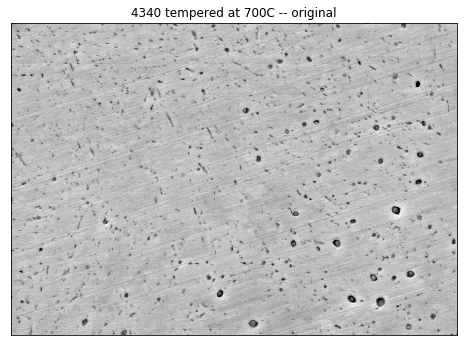

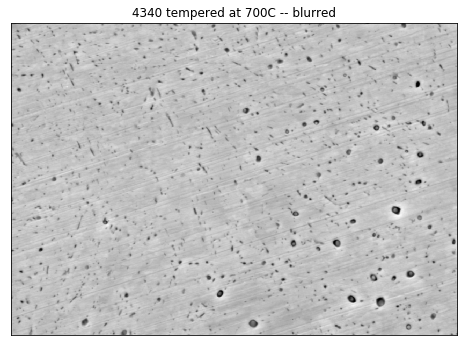

In [3]:
from skimage.filters import gaussian

image_name = "2015_09_10_700(10)_q015.tif"
mic = kseg.prepare_image(image_name)
fig, ax = kseg.plot_single_image(mic)
ax.set_title('4340 tempered at 700C -- original')
fig, ax = kseg.plot_single_image(gaussian(mic, sigma=1))
ax.set_title('4340 tempered at 700C -- blurred')

Results calculated: 3 clusters, 5 centroid initializations


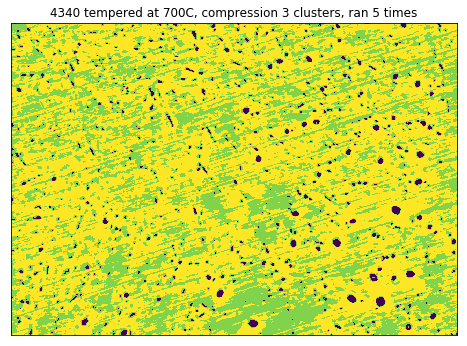

In [4]:
mic = gaussian(mic, sigma=1)
comp_mic_nc3 = kseg.k_means_segmentation(mic, n_clusters=3, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc3, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 3 clusters, ran 5 times")

Results calculated: 5 clusters, 5 centroid initializations


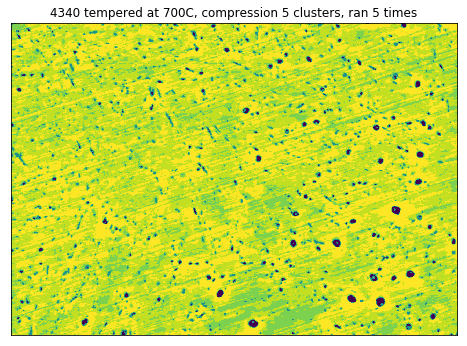

In [5]:
comp_mic_nc5 = kseg.k_means_segmentation(mic, n_clusters=5, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc5, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 5 clusters, ran 5 times")

Results calculated: 8 clusters, 5 centroid initializations


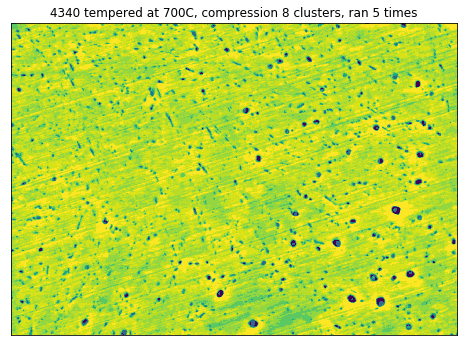

In [6]:
comp_mic_nc8 = kseg.k_means_segmentation(mic, n_clusters=8, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc8, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 8 clusters, ran 5 times")

Results calculated: 16 clusters, 5 centroid initializations


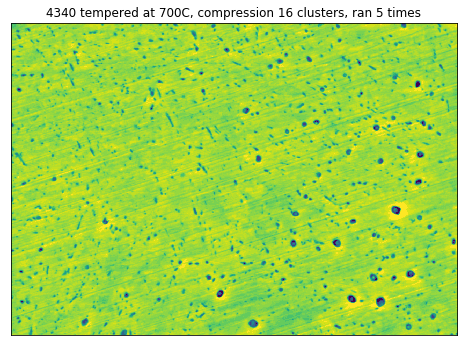

In [7]:
comp_mic_nc16 = kseg.k_means_segmentation(mic, n_clusters=16, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc16, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 16 clusters, ran 5 times")

Results calculated: 32 clusters, 5 centroid initializations


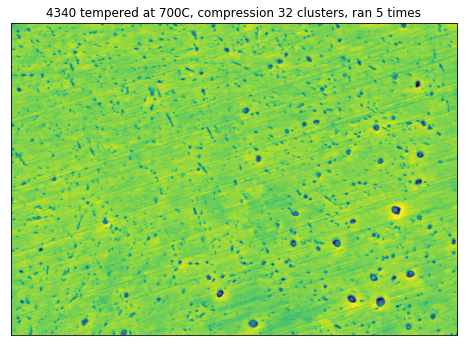

In [8]:
reload(kseg)
comp_mic_nc32 = kseg.k_means_segmentation(mic, n_clusters=32, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc32, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 32 clusters, ran 5 times")

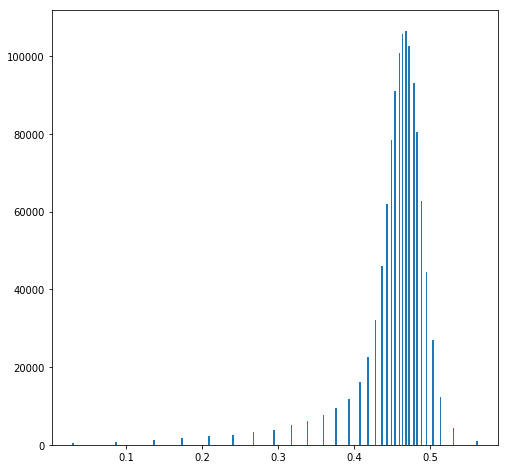

In [9]:
from skimage.exposure import histogram
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
im_hist = ax.hist(comp_mic_nc32.ravel(), 256)

(<matplotlib.figure.Figure at 0x7ff755aaa150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff755a9c0d0>)

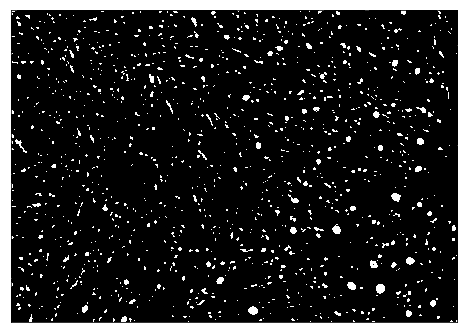

In [13]:
bin_mic_nc32 = kseg.binarize_image(comp_mic_nc32, threshold=0.4)
kseg.plot_single_image(bin_mic_nc32)

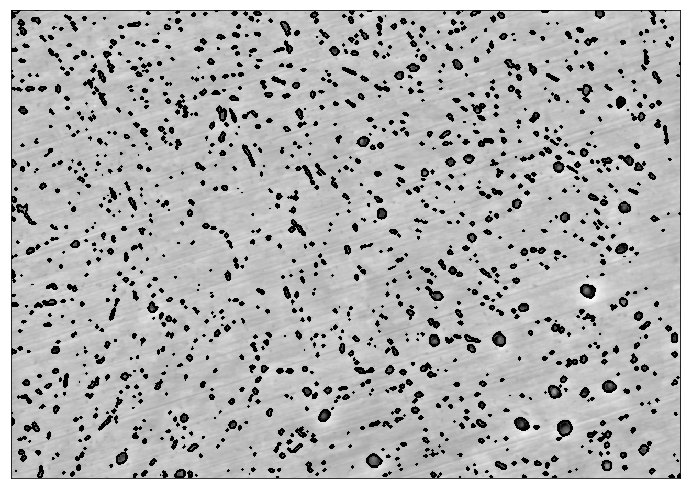

In [14]:
reload(kseg)
kseg.draw_particle_contours(comp_mic_nc32, mic, threshold=0.4, figsize=12)

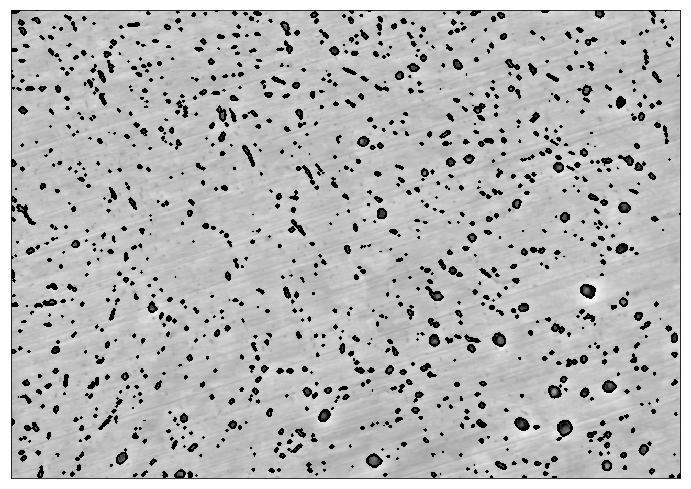

In [18]:
kseg.draw_particle_contours(comp_mic_nc32, mic, threshold=0.38, figsize=12)